# **Classification of Aircraft Damage Using VGG16 Pre-trained Model**


----

## Introduction

In this project, we classify aircraft damage using a pre-trained VGG16 model.

## Project Overview

Aircraft damage detection is essential for maintaining the safety and longevity of aircraft. Traditional manual inspection methods are time-consuming and prone to human error. This project aims to automate the classification of aircraft damage into two categories: "dent" and "crack." For this, we will utilize feature extraction with a pre-trained VGG16 model to classify the damage from aircraft images.

## Aim of the Project

The goal of this project is to develop an automated model that accurately classifies aircraft damage from images. By the end of the project, we will have trained and evaluated a model that utilizes feature extraction from VGG16 for damage classification. This model will be applicable in real-world damage detection within the aviation industry.

## Final Output
A trained model capable of classifying aircraft images into "dent" and "crack" categories, enabling automated aircraft damage detection.


We will be using the [Aircraft dataset](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/ZjXM4RKxlBK9__ZjHBLl5A/aircraft-damage-dataset-v1.tar).
The dataset is taken from the here (Original Source): [Roboflow Aircraft Dataset](https://universe.roboflow.com/youssef-donia-fhktl/aircraft-damage-detection-1j9qk) Provided by a Roboflow user, License: CC BY 4.


<h2>Table of Contents</h2>
 
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <p><font size="5">Classification Problem: Classifying the defect on the aircraft as 'dent' or 'crack'</p>
<font size="3">
        1. <a href="#1.1-Dataset-Preparation">1.1 Dataset Preparation</a><br>
        2. <a href="#1.2-Data-Preprocessing">1.2 Data Preprocessing</a><br>
        3. <a href="#1.3-Model-Definition">1.3 Model Definition</a><br>
        4. <a href="#1.4-Model-Training">1.4 Model Training</a><br>
        5. <a href="#1.5-Visualizing-Training-Results">1.5 Visualizing Training Results</a><br>
        6. <a href="#1.6-Model-Evaluation">1.6 Model Evaluation</a><br>
        7. <a href="#1.7-Visualizing-Predictions">1.7 Visualizing Predictions</a><br>
    <br>
    


# 1.1 Dataset-Preparation


## Objectives

- Use the VGG16 model for image classification.
- Prepare and preprocess image data for a machine learning task.
- Evaluate the model’s performance using appropriate metrics.
- Visualize model predictions on test data.


### Task List
To achieve the above objectives, we will complete the following tasks:

- Task 1: Create a `valid_generator` using the `valid_datagen` object
- Task 2: Create a `test_generator` using the `test_datagen` object
- Task 3: Load the VGG16 model
- Task 4: Compile the model
- Task 5: Train the model
- Task 6: Plot accuracy curves for training and validation sets 
- Task 7: Visualizing the results 

## Setup


In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Installing Required Libraries


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [ ]:
!pip install pandas==2.2.3
!pip install tensorflow==2.17.1
!pip install pillow==11.1.0
!pip install matplotlib==3.9.2
!pip install transformers==4.38.2
!pip install torch

#### Suppress the tensorflow warning messages
We use the following code to  suppress the warning messages due to use of CPU architechture for tensoflow.

You may want to **comment out** these lines if you are using the GPU architechture


In [48]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

### Importing Required Libraries


In [49]:
import zipfile
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.applications import VGG16
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
import random

In [50]:
# Set seed for reproducibility
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

#### Pretrained Model

A pretrained model refers to a machine learning model that has already been trained on a large dataset, typically for a specific task, and is ready for use or fine-tuning on a new task or dataset. The key idea behind a pretrained model is that it has already learned useful patterns or features from the data it was trained on, so you don’t need to start from scratch.

- **ResNet, VGG (Image Classification):** These are pretrained models commonly used for image classification tasks. They have learned from millions of images and can be fine-tuned for specific image-related tasks.

- **BLIP (Image Captioning and Summarization):** BLIP is a pretrained model that can generate captions and summaries for images. It has already been trained on image-text pairs, so it can easily generate descriptive captions for new images.


## <a id='toc1_'> </a> [Classification Problem: Classifying the defect on the aircraft as 'dent' or 'crack'](#toc1_) 

### <a id='toc1_1_'></a> [1.1 Dataset Preparation](#toc1_) 

The first step is to load and prepare the dataset of aircraft images. These images are labeled either as 'dent' or 'crack'. We will also split the dataset into training, validation, and test sets.

Our goal is to train an algorithm on these images and to predict the labels for images in your test set.




**Define configuration options**

In [51]:
#Set the batch size,epochs
batch_size = 32
n_epochs = 5
img_rows, img_cols = 224, 224
input_shape = (img_rows, img_cols, 3) # RGB images

Extract the Dataset:
Unzip the dataset to the current directory, creating directories for training, testing, and validation splits.


In [6]:
import tarfile
import urllib.request
import os
import shutil

# URL of the tar file
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/ZjXM4RKxlBK9__ZjHBLl5A/aircraft-damage-dataset-v1.tar"

# Define the path to save the file
tar_filename = "aircraft_damage_dataset_v1.tar"
extracted_folder = "aircraft_damage_dataset_v1"  # Folder where contents will be extracted

# Download the tar file
urllib.request.urlretrieve(url, tar_filename)
print(f"Downloaded {tar_filename}. Extraction will begin now.")

# Check if the folder already exists
if os.path.exists(extracted_folder):
    print(f"The folder '{extracted_folder}' already exists. Removing the existing folder.")
    
    # Remove the existing folder to avoid overwriting or duplication
    shutil.rmtree(extracted_folder)
    print(f"Removed the existing folder: {extracted_folder}")

# Extract the contents of the tar file
with tarfile.open(tar_filename, "r") as tar_ref:
    tar_ref.extractall()  # This will extract to the current directory
    print(f"Extracted {tar_filename} successfully.")


Downloaded aircraft_damage_dataset_v1.tar. Extraction will begin now.
Extracted aircraft_damage_dataset_v1.tar successfully.


/var/folders/xy/2yvnpx8d56vfjg1nvw677xx80000gn/T/ipykernel_36185/2111111657.py:27: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar_ref.extractall()  # This will extract to the current directory


The folder structure looks as follows:

```python
aircraft_damage_dataset_v1/
├── train/
│   ├── dent/
│   └── crack/
├── valid/
│   ├── dent/
│   └── crack/
└── test/
    ├── dent/
    └── crack/

```



In [52]:
# Define directories for train, test, and validation splits
extract_path = "aircraft_damage_dataset_v1"
train_dir = os.path.join(extract_path, 'train')
test_dir = os.path.join(extract_path, 'test')
valid_dir = os.path.join(extract_path, 'valid')

## 1.2 Data Preprocessing

Create data generators for training, validation, and testing datasets.

First, we will create `ImageDataGenerators` used for training, validation and testing.
The `ImageDataGenerator` class is part of Keras. It is a powerful utility for real-time image data augmentation, preprocessing, and feeding data into deep learning models during training. This class is particularly useful when working with image datasets that are too large to fit into memory all at once, or when you want to augment your dataset to improve model generalization. 

We will create instances of the `ImageDataGenerator` class. Each instance corresponds to one of the datasets: training, validation, and testing.


In [53]:
# Create ImageDataGenerators to preprocess the data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

Next, we use `flow_from_directory()` method to load the images from directory and generate the training dataset. The `flow_from_directory()` method is part of the `ImageDataGenerator` class in Keras, and it plays a crucial role in automating the process of loading, preprocessing, and batching images for training, validation, and testing.
We use the `train_datagen` object to load and preprocess the training images. Specifically, the `flow_from_directory()` function is used to read images directly from the directory and generate batches of data that will be fed into the model for training.


In [54]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_rows, img_cols),   # Resize images to the size VGG16 expects
    batch_size=batch_size,
    seed = seed_value,
    class_mode='binary',
    shuffle=True # Binary classification: dent vs crack
)

Found 300 images belonging to 2 classes.


## Task 1: Create a `valid_generator` using the `valid_datagen` object

In [ ]:
valid_generator = valid_datagen.flow_from_directory(
    directory=valid_dir,
    class_mode='binary',
    target_size=(img_rows, img_cols),   # Resize images to the size VGG16 expects
    batch_size=batch_size,
    seed = seed_value,
    shuffle=False # Binary classification: dent vs crack
)

Found 96 images belonging to 2 classes.


## Task 2: Create a `test_generator` using the `test_datagen` object

In [56]:
#Write your code here

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(img_rows, img_cols),   # Resize images to the size VGG16 expects
    batch_size=batch_size,
    class_mode='binary',
    seed = seed_value,
    shuffle=False # Binary classification: dent vs crack
)   

Found 50 images belonging to 2 classes.


## 1.3 Model Definition

Here, we define the model architecture by using a pre-trained VGG16 model as the base, adding custom layers on top for binary classification of 'dent' and 'crack' types of damage.


## Task 3: Load the pre-trained model VGG16

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Now, we modify the VGG16 model for our specific classification task. We extract the output from the last layer of the pre-trained VGG16 model, and then create a new model with this modified output. Then we will freeze the base VGG16 model layers so that their weights will not be updated during training.


In [57]:
output = base_model.layers[-1].output
output = keras.layers.Flatten()(output)
base_model = Model(base_model.input, output)

# Freeze the base VGG16 model layers
for layer in base_model.layers:
    layer.trainable = False

After using VGG16 as a feature extractor, we add our own classifier on top of the VGG16 model. This involves adding fully connected layers (Dense), activation functions (like ReLU), and sometimes Dropout layers to avoid overfitting.
Here, we are adding two dense layers with 512 units each, followed by a Dropout layer, and finally, a Dense layer with one unit and a sigmoid activation to output the probability for binary classification ("dent" vs "crack").


In [58]:
# Build the custom model
model = Sequential()
model.add(base_model)
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

## Task 4: Compile the model

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

## 1.4 Model Training

- This section covers the process of training the model using the prepared dataset.


## Task 5: Model Training

In [ ]:
history = model.fit(x=train_generator, epochs=n_epochs, validation_data=valid_generator, verbose=1)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.5400 - loss: 0.7021 - val_accuracy: 0.4896 - val_loss: 0.7796
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.6567 - loss: 0.6422 - val_accuracy: 0.6562 - val_loss: 0.6174
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.7700 - loss: 0.4941 - val_accuracy: 0.7292 - val_loss: 0.5390
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.7667 - loss: 0.4608 - val_accuracy: 0.7083 - val_loss: 0.5263
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.8333 - loss: 0.3685 - val_accuracy: 0.7083 - val_loss: 0.4958


In [61]:
# Access the training history
train_history = model.history.history  # After training

## 1.5 Visualizing Training Results

- After training the model, we visualize the training and validation accuracy and loss to understand the model's learning process.


### Plot loss curves for training and validation sets


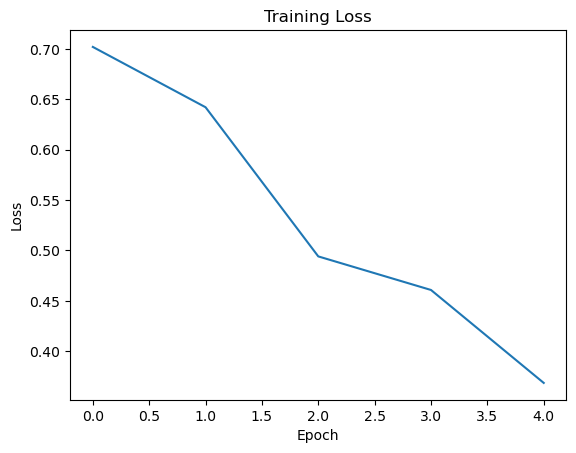

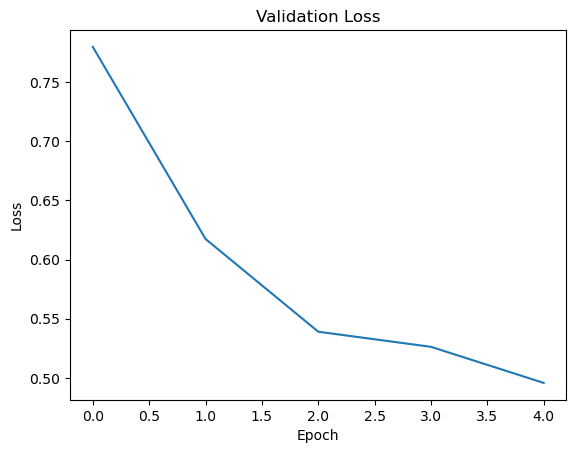

In [62]:
# Plot the loss for both training and validation
plt.title("Training Loss")
plt.ylabel("Loss")
plt.xlabel('Epoch')
plt.plot(train_history['loss'])
plt.show()

plt.title("Validation Loss")
plt.ylabel("Loss")
plt.xlabel('Epoch')
plt.plot(train_history['val_loss'])
plt.show()

## Task 6: Plot accuracy curves for training and validation sets

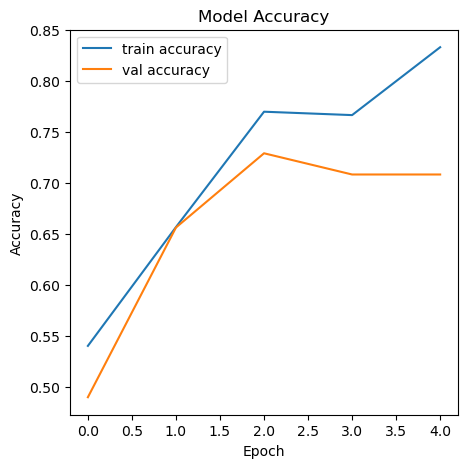

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 1.6 Model Evaluation

Now we evaluate the trained model on the test dataset. Calculates test loss and accuracy by evaluating the test generator. Predictions are made for the test dataset, and the results are compared to true labels.


In [64]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8125 - loss: 0.4005
Test Loss: 0.4005
Test Accuracy: 0.8125


 ## 1.7 Visualizing Predictions

Display test images alongside their true and predicted labels.

True labels and predictions are retrieved.
Images are displayed with labels for visual inspection of model performance.


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Function to plot a single image and its prediction
def plot_image_with_title(image, model, true_label, predicted_label, class_names):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)

    # Convert labels from one-hot to class indices if needed, but for binary labels it's just 0 or 1
    true_label_name = class_names[true_label]  # Labels are already in class indices
    pred_label_name = class_names[predicted_label]  # Predictions are 0 or 1

    plt.title(f"True: {true_label_name}\nPred: {pred_label_name}")
    plt.axis('off')
    plt.show()

# Function to test the model with images from the test set
def test_model_on_image(test_generator, model, index_to_plot=0):
    # Get a batch of images and labels from the test generator
    test_images, test_labels = next(test_generator)

    # Make predictions on the batch
    predictions = model.predict(test_images)

    # In binary classification, predictions are probabilities (float). Convert to binary (0 or 1)
    predicted_classes = (predictions > 0.5).astype(int).flatten()

    # Get the class indices from the test generator and invert them to get class names
    class_indices = test_generator.class_indices
    class_names = {v: k for k, v in class_indices.items()}  # Invert the dictionary

    # Specify the image to display based on the index
    image_to_plot = test_images[index_to_plot]
    true_label = test_labels[index_to_plot]
    predicted_label = predicted_classes[index_to_plot]

    # Plot the selected image with its true and predicted labels
    plot_image_with_title(image=image_to_plot, model=model, true_label=true_label, predicted_label=predicted_label, class_names=class_names)




## Task 7: Visualizing the results

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


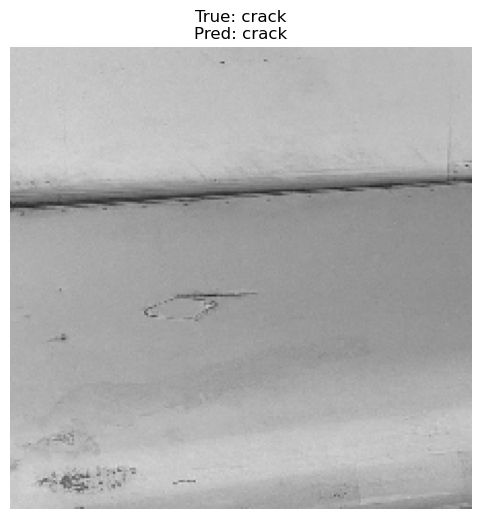

In [ ]:
test_model_on_image(test_generator, model, index_to_plot=1) 

-------